In [2]:
from tensorflow.keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170508288/170498071 [==============================] - 4s 0us/step


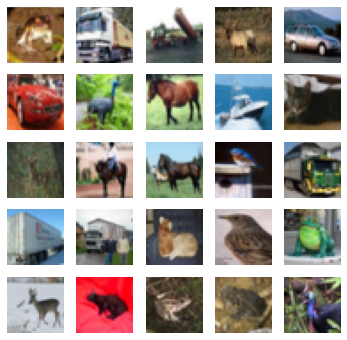

In [3]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))

for i in range(25):
  plt.subplot(5, 5, i+1)
  plt.imshow(x_train[i])
  plt.axis('off')

plt.show()

In [4]:
import numpy as np

x_train = x_train.reshape(-1, 32, 32, 3)
x_test = x_test.reshape(-1, 32, 32, 3)

print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

x_train = x_train.astype(np.float32) / 255.0
x_tetst = x_test.astype(np.float32) / 255.0

(50000, 32, 32, 3) (10000, 32, 32, 3)
(50000, 1) (10000, 1)


In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

img = ImageDataGenerator(rotation_range=20,
                         shear_range=0.2,
                         width_shift_range=0.2,
                         height_shift_range=0.2,
                         horizontal_flip=True)

augment_ratio = 1.5
augment_size = int(augment_ratio * x_train.shape[0])
randidx = np.random.randint(x_train.shape[0], size=augment_size)

x_augmented = x_train[randidx].copy()
y_augmented = y_train[randidx].copy()

x_augmented, y_augmented = img.flow(x_augmented, y_augmented, 
                                    batch_size=augment_size,
                                    shuffle=False).next()

x_train = np.concatenate((x_train, x_augmented))
y_train = np.concatenate((y_train, y_augmented))

s = np.arange(x_train.shape[0])
np.random.shuffle(s)

x_train = x_train[s]
y_train = y_train[s]

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D
from tensorflow.keras.layers import Flatten, Dense, Dropout

cnn = Sequential()

cnn.add(Conv2D(32, (3,3), activation='relu', padding='same', 
               input_shape=(32,32,3)))
cnn.add(Conv2D(32, (3,3), activation='relu', padding='same'))
cnn.add(MaxPool2D(pool_size=(2,2)))
cnn.add(Dropout(0.25))

cnn.add(Conv2D(64, (3,3), activation='relu', padding='same'))
cnn.add(Conv2D(64, (3,3), activation='relu', padding='same'))
cnn.add(MaxPool2D(pool_size=(2,2)))
cnn.add(Dropout(0.25))

cnn.add(Conv2D(128, (3,3), activation='relu', padding='same'))
cnn.add(MaxPool2D(pool_size=(2,2)))
cnn.add(Dropout(0.25))

cnn.add(Conv2D(128, (3,3), activation='relu', padding='same'))
cnn.add(MaxPool2D(pool_size=(2,2)))
cnn.add(Dropout(0.25))

cnn.add(Conv2D(256, (3,3), activation='relu', padding='same'))
cnn.add(MaxPool2D(pool_size=(2,2)))
cnn.add(Dropout(0.25))

cnn.add(Flatten())
cnn.add(Dense(128, activation='relu'))
cnn.add(Dropout(0.5))
cnn.add(Dense(10, activation='softmax'))

cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

training = cnn.fit(x_train, y_train, batch_size=256, epochs=100, 
                   validation_data=(x_test, y_test))

Epoch 1/100
489/489 [==============================] - 43s 24ms/step - loss: 1.8075 - accuracy: 0.3152 - val_loss: 154.1499 - val_accuracy: 0.3349
Epoch 2/100
489/489 [==============================] - 11s 22ms/step - loss: 1.3879 - accuracy: 0.4999 - val_loss: 147.1332 - val_accuracy: 0.3655
Epoch 3/100
489/489 [==============================] - 11s 22ms/step - loss: 1.2108 - accuracy: 0.5720 - val_loss: 125.0076 - val_accuracy: 0.4131
Epoch 4/100
489/489 [==============================] - 11s 22ms/step - loss: 1.0931 - accuracy: 0.6161 - val_loss: 123.3485 - val_accuracy: 0.4327
Epoch 5/100
489/489 [==============================] - 11s 23ms/step - loss: 1.0084 - accuracy: 0.6515 - val_loss: 117.7825 - val_accuracy: 0.4803
Epoch 6/100
489/489 [==============================] - 11s 23ms/step - loss: 0.9447 - accuracy: 0.6759 - val_loss: 156.5778 - val_accuracy: 0.4423
Epoch 7/100
489/489 [==============================] - 11s 23ms/step - loss: 0.8928 - accuracy: 0.6932 - val_loss: 94.

In [7]:
cnn.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 57.5612 - accuracy: 0.6419


[57.56117630004883, 0.6419000029563904]

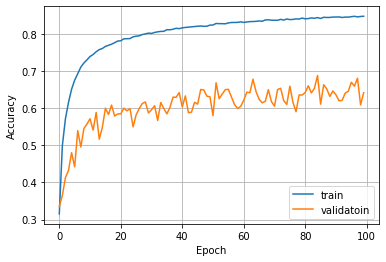

In [8]:
import matplotlib.pyplot as plt

plt.plot(training.history['accuracy'], label='train')
plt.plot(training.history['val_accuracy'], label='validatoin')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

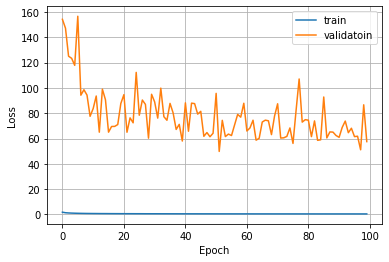

In [9]:
plt.plot(training.history['loss'], label='train')
plt.plot(training.history['val_loss'], label='validatoin')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

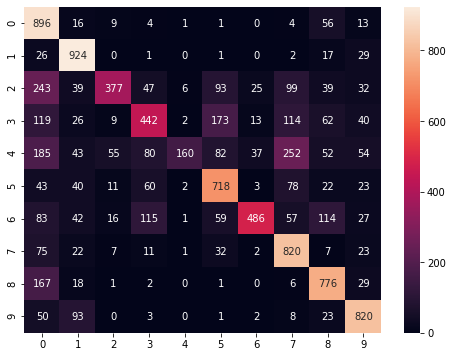

In [10]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

plt.figure(figsize=(8,6))

p = cnn.predict(x_test)
c = confusion_matrix(y_test, np.argmax(p, axis=1))

sns.heatmap(c, annot=True, fmt='d')
plt.show()

In [11]:
print(c)
print('\n')

for i in range(10):
  print(('%d\t (%d/%d)\taccuracy = %.3f') % (i, np.max(c[i]), np.sum(c[i]), np.max(c[i])/np.sum(c[i])))

[[896  16   9   4   1   1   0   4  56  13]
 [ 26 924   0   1   0   1   0   2  17  29]
 [243  39 377  47   6  93  25  99  39  32]
 [119  26   9 442   2 173  13 114  62  40]
 [185  43  55  80 160  82  37 252  52  54]
 [ 43  40  11  60   2 718   3  78  22  23]
 [ 83  42  16 115   1  59 486  57 114  27]
 [ 75  22   7  11   1  32   2 820   7  23]
 [167  18   1   2   0   1   0   6 776  29]
 [ 50  93   0   3   0   1   2   8  23 820]]


0	 (896/1000)	accuracy = 0.896
1	 (924/1000)	accuracy = 0.924
2	 (377/1000)	accuracy = 0.377
3	 (442/1000)	accuracy = 0.442
4	 (252/1000)	accuracy = 0.252
5	 (718/1000)	accuracy = 0.718
6	 (486/1000)	accuracy = 0.486
7	 (820/1000)	accuracy = 0.820
8	 (776/1000)	accuracy = 0.776
9	 (820/1000)	accuracy = 0.820
